## Download
Here we download the data and create the dataframe.

In [1]:
import pandas as pd

cars = pd.read_csv("cars_data.csv", sep=";")
cars

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,VOLVO,XC70,XC70,XC70 D4 4cyl (181ch) Stop&Start Geartronic 8,M10VLVVP900U606,BZ73CD,GO,non,10,133,...,NaN,"0,048","0,064999998","0,002",1755,1755,715/2007*195/2013EURO6,mars-14,BREAK,SUPERIEURE
55040,VOLVO,XC70,XC70,XC70 D4 5cyl (181ch) AWD Geartronic 6,M10VLVVP900V607,BZ8156,GO,non,11,133,...,NaN,"0,115999997","0,151999995",0,1799,1799,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE
55041,VOLVO,XC70,XC70,XC70 D5 (215ch) AWD Geartronic 6,M10VLVVP872R581,BZ8256,GO,non,13,158,...,NaN,"0,115999997","0,151999995",0,1798,1798,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE
55042,VOLVO,XC70,XC70,XC70 D5 (215ch) Stop&Start AWD BVM6,M10VLVVP8723582,BZ83A4,GO,non,12,158,...,NaN,"0,105999999","0,143999994",0,1788,1788,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE


## Describe

Here we describe the data.

In [2]:
cars = cars.fillna(method="ffill")
cars["Carrosserie"].unique()

array(['BERLINE', 'BREAK', 'COUPE', 'CABRIOLET', 'TS TERRAINS/CHEMINS',
       'COMBISPACE', 'MINISPACE', 'MONOSPACE COMPACT', 'MONOSPACE',
       'MINIBUS', 'COMBISPCACE'], dtype=object)

In [3]:
def order(x, arr):
    for y in arr:
        if y.__contains__(x):
            return arr.index(y) + 1
    return 0

In [4]:
arr = ['ECONOMIQUE', 'INFERIEURE', 'MOY-INFERIEURE', 'MOY-SUPER', 'SUPERIEURE', 'LUXE']
cars["gamme_ordonnée"] = [order(x, arr) for x in cars["gamme"]]
cars["hybride_ordonnée"] = cars["hybride"].replace("non", 0).replace("oui", 1)
for x in cars["Carrosserie"].unique():
        cars[x] = (cars["Carrosserie"] == x).replace(True, 1).replace(False, 0)
        #cars[x] = np.where(x['Carrosserie'] == x, 1, 0)

cars[cars.columns[-len(cars["Carrosserie"].unique()):]]

,BERLINE,BREAK,COUPE,CABRIOLET,TS TERRAINS/CHEMINS,COMBISPACE,MINISPACE,MONOSPACE COMPACT,MONOSPACE,MINIBUS,COMBISPCACE
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55039,0,1,0,0,0,0,0,0,0,0,0
55040,0,1,0,0,0,0,0,0,0,0,0
55041,0,1,0,0,0,0,0,0,0,0,0
55042,0,1,0,0,0,0,0,0,0,0,0


## Analyze
Here we analyze how dependent CO2 is of other data.

<AxesSubplot:>

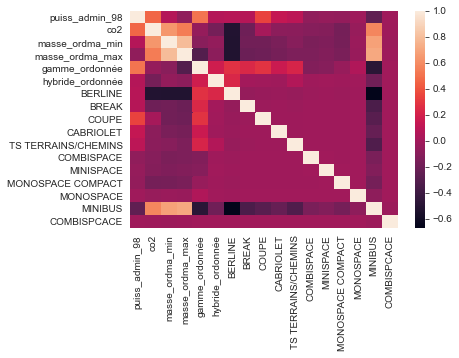

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
sns.heatmap(cars.corr())

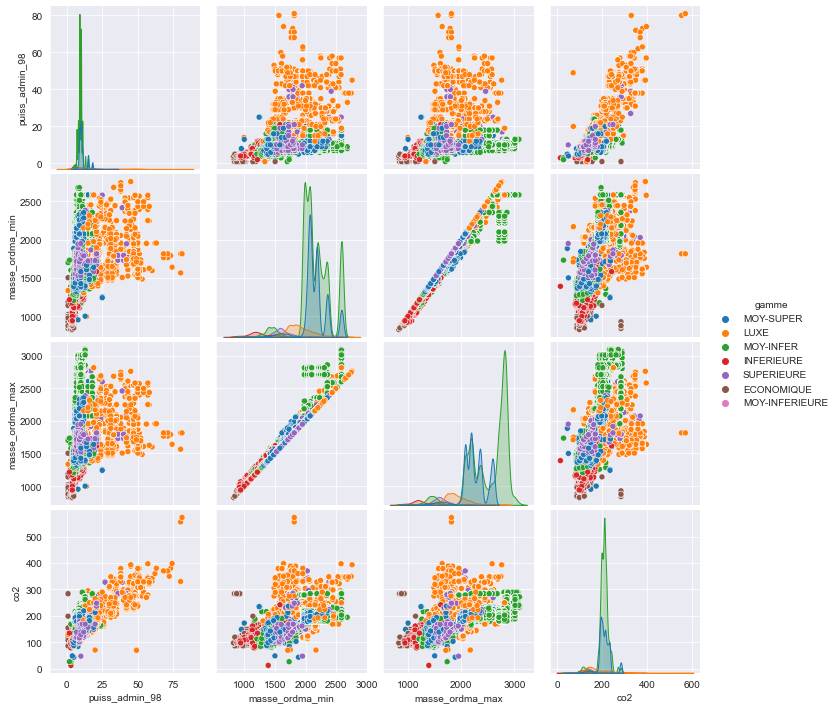

In [6]:
sns.pairplot(data=cars[["puiss_admin_98", "masse_ordma_min", "masse_ordma_max", "co2", "gamme"]], hue="gamme")

CO2 could be dependent on puiss_admin_98, on lib_mrq, on gamme and on puiss_max.

## Modelize
Here we will train ou model and predict CO2 emissions.


In [7]:
>>> from sklearn import linear_model
# After many tests, we select the Ridge linear model to reduce co-dependence between variables and overfitting.
model = linear_model.Ridge(alpha=1)

train_x = ["puiss_admin_98", "gamme_ordonnée", "hybride_ordonnée", 'BERLINE', 'BREAK', 'COUPE', 'CABRIOLET', 'TS TERRAINS/CHEMINS',
       'COMBISPACE', 'MINISPACE', 'MONOSPACE COMPACT', 'MONOSPACE', 'MINIBUS',
       'COMBISPCACE']

model.fit(cars[train_x], cars["co2"])
model.score(cars[train_x], cars["co2"])

0.7719361116123854

In [8]:
prediction = model.predict(cars[train_x])

<AxesSubplot:ylabel='co2'>

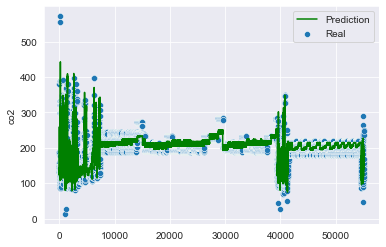

In [9]:
# Here is a quick test of how our model looks on the whole dataset.
# While the sheer number of records may biase our interpretation, the plot looks somewhat overfit.

sns.scatterplot(x=cars.index, y=cars["co2"], label="Real")
sns.lineplot(x=cars.index, y=prediction, label="Prediction", color="green")

In [32]:
# Here is the real exercise, in which we have to predict the emissions of 6 different brands.

predicted_cars = {"AUDI":"", "CITROEN":"", "KIA":"", "SUBARU":"", "SMART":"", "MINI":""}
training_cars = cars

for x in predicted_cars:
    predicted_cars[x] = cars.where(cars["lib_mrq"] == x).dropna()
    training_cars = training_cars.where(training_cars["lib_mrq"] != x).dropna()

model.fit(training_cars[train_x], training_cars["co2"])
model.score(training_cars[train_x], training_cars["co2"])

0.7425317752188414

In [1]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# We use cross-validation to make sure our data isn't overfit to our training set

cross_val_score(model, training_cars[train_x], training_cars['co2'], cv=StratifiedKFold(5)).mean()

NameError: name 'model' is not defined

0.8318635097695938


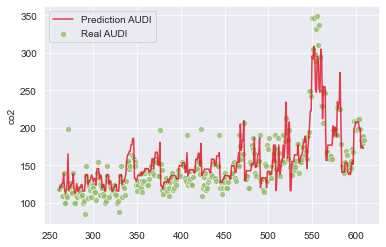

0.6433547620045796


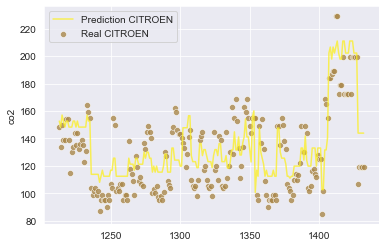

0.5846465509692826


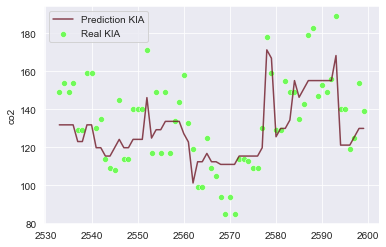

0.5284377136722844


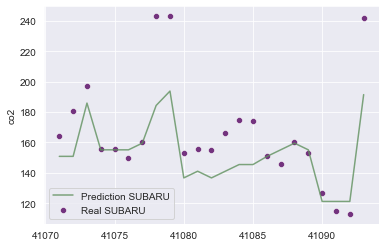

-0.2031230816092957


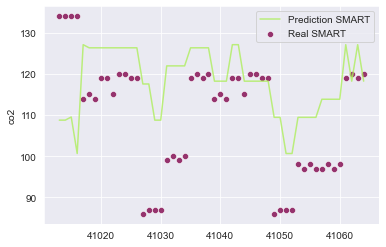

0.649181378335534


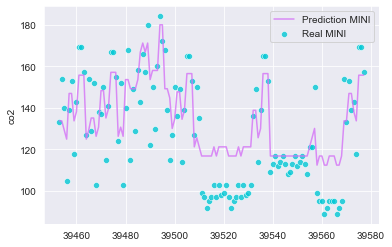

In [11]:
import random
import matplotlib.pyplot as plt

# We plot every brand in order to perceive how well our model fairs against testing data.

for x in predicted_cars:
    print(model.score(predicted_cars[x][train_x], predicted_cars[x]["co2"]))
    
    sns.scatterplot(x=predicted_cars[x].index, y=predicted_cars[x]["co2"], label="Real "+x, color=(random.random(),random.random(),random.random(), 0.8))
    sns.lineplot(x=predicted_cars[x].index, y=model.predict(predicted_cars[x][train_x]), label="Prediction "+x, color=(random.random(),random.random(),random.random(), 0.8))
    plt.show()

# Conclusion

While our model most likely isn't the most efficient one, it remains accurate enough for most of the brands.
We face an extreme value in the SMART model which may be due to some inherent differences : our model has been tested on car brands, however should SMART cars behave differently from how other brands work, our model won't be able to predict their emissions.
Overall, we may conclude understanding the dataset and engineering coherent features is key to programming a  machine learning model.